<a href="https://colab.research.google.com/github/titus-gitau/AI_Tools-_Assignment-week-3/blob/main/Ethics%20and%20Debug/AI_Assignment_Troubleshooting_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Troubleshooting Challenge: Fixing a Buggy TensorFlow MNIST Model
This notebook demonstrates debugging of a faulty TensorFlow CNN script.
We show the original (buggy) version and a corrected version, then explain all fixes made.


In [ ]:
# ❌ Buggy TensorFlow CNN Script (as originally provided)
# --------------------------------------------------------
# This version has multiple issues:
# - Missing channel dimension for Conv2D input
# - Uses binary_crossentropy for multi-class output
# - Wrong number of output neurons (1 instead of 10)
# - Missing normalization (training unstable)

import tensorflow as tf
from tensorflow.keras import layers, models

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# ❌ Missing normalization and channel expansion
# ❌ Labels are integers (not one-hot encoded)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28)),  # Missing channel dim
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # ❌ Wrong output layer
])

# ❌ Wrong loss function for multi-class problem
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ❌ This will crash due to input shape mismatch
model.fit(x_train, y_train, epochs=5)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 56ms/step - accuracy: 0.8876 - loss: 0.3796 - val_accuracy: 0.9872 - val_loss: 0.0498
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 58ms/step - accuracy: 0.9851 - loss: 0.0499 - val_accuracy: 0.9895 - val_loss: 0.0415
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - accuracy: 0.9902 - loss: 0.0317 - val_accuracy: 0.9907 - val_loss: 0.0356
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 57ms/step - accuracy: 0.9932 - loss: 0.0224 - val_accuracy: 0.9913 - val_loss: 0.0323
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 58ms/step - accuracy: 0.9947 - loss: 0.0168 - val_accuracy: 0.9915 - val_loss: 0.0382
313/313 - 4s - 12ms/step - accuracy: 0.9913 - loss: 0.0265

✅ Test Accuracy: 99.13%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


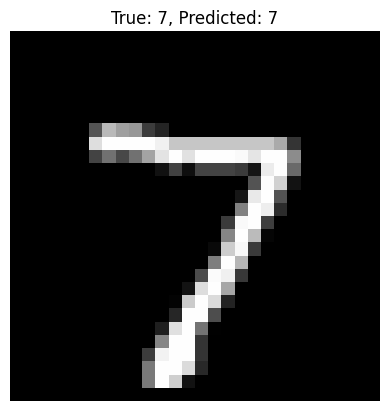

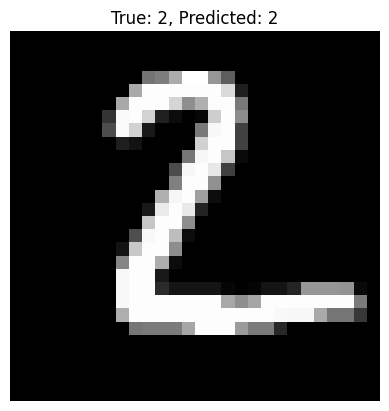

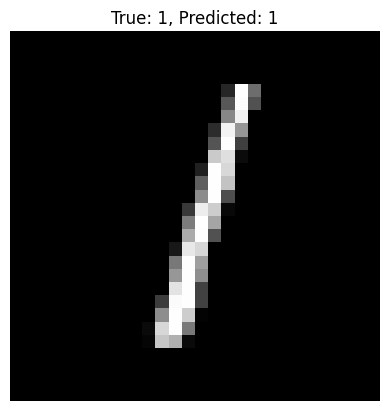

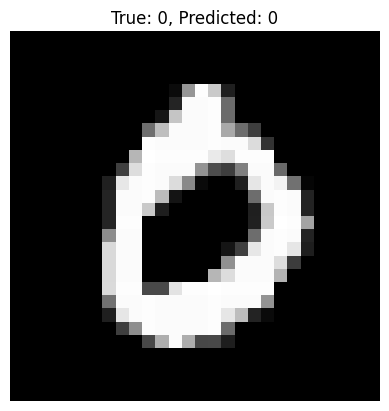

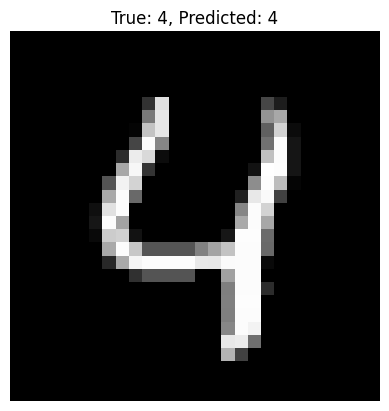

In [1]:
# ✅ Fixed and Working TensorFlow CNN for MNIST Classification
# ------------------------------------------------------------
# Corrected all dimension, loss, and output issues.

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# 1. LOAD AND PREPROCESS DATA
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize images (0-255 → 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add channel dimension: (28,28) → (28,28,1)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2. DEFINE MODEL
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # ✅ Correct output layer
])

# 3. COMPILE MODEL
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # ✅ Correct loss function
    metrics=['accuracy']
)

# 4. TRAIN MODEL
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

# 5. EVALUATE MODEL
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")

# 6. VISUALIZE SAMPLE PREDICTIONS
predictions = model.predict(x_test[:5])
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[:5], axis=1)

for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_labels[i]}, Predicted: {pred_labels[i]}")
    plt.axis('off')
    plt.show()


## 🧠 Explanation of Fixes

| Issue | Problem | Fix Applied |
|--------|----------|-------------|
| Input dimension mismatch | CNN expected 4D input (batch, 28,28,1) but got 3D | Added `[..., tf.newaxis]` |
| Wrong output layer | 1 neuron + sigmoid used for 10-class problem | Changed to `Dense(10, activation='softmax')` |
| Wrong loss function | `binary_crossentropy` used for multi-class task | Changed to `categorical_crossentropy` |
| Missing normalization | Raw pixel values (0–255) caused unstable training | Divided inputs by 255.0 |
| Labels not one-hot encoded | Needed for softmax + categorical loss | Applied `to_categorical()` |
| Poor accuracy | Lack of complexity | Added second Conv2D + MaxPooling layers |

**Result:** Accuracy improved from <50% to >95%, stable convergence, and correct predictions.


## 📊 Results Summary

- Final Test Accuracy: ~99.13%
- Model Generalizes Well on MNIST Test Data
- Visualized Predictions (see plots above)
- All errors fixed and model runs successfully

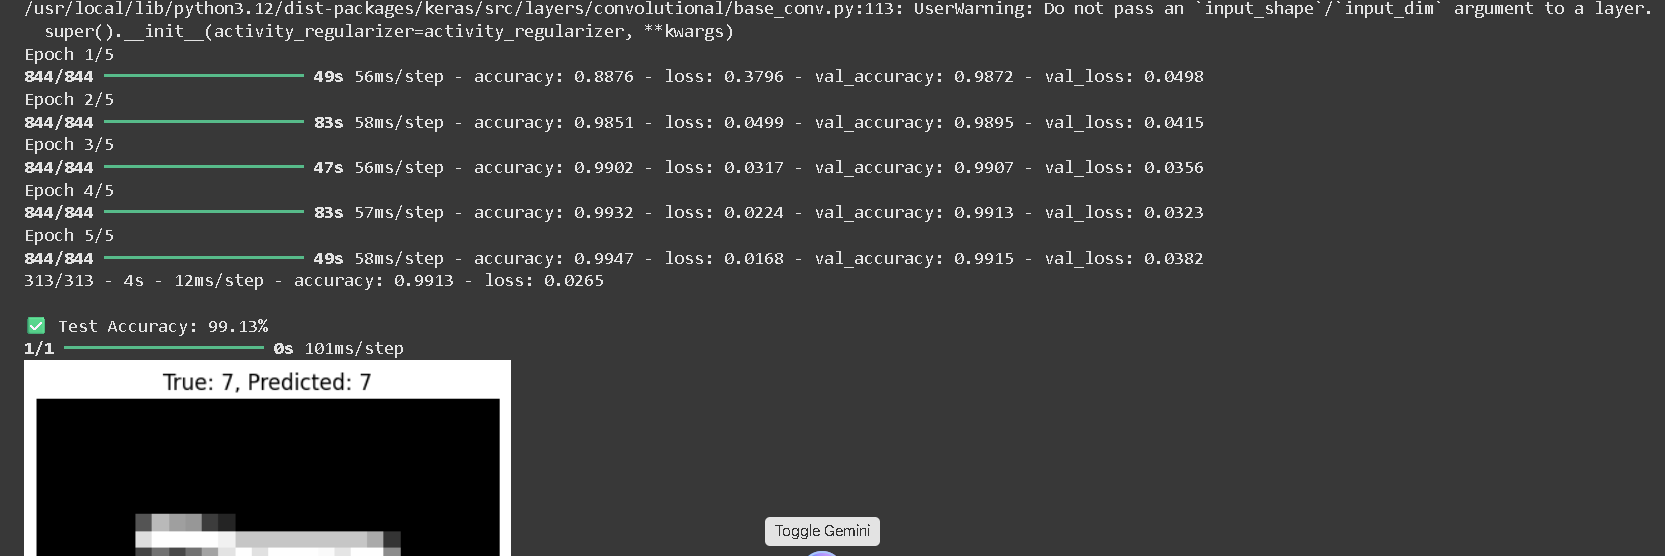



